<a href="https://colab.research.google.com/github/kanjamwingirwa/DS12_IP2/blob/main/FARNADIS_KANJA_DS12_IP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question: 
How can we predict individuals who are most likely to have a Bank Account in Kenya, Uganda, Tanzania and Rwanda

Metric For Success:
Determine each variable and how it correlates with the number of bank accounts

Context: The data was collected in the Four East African countries mentioned

Experimental Design:
We use Exploratory Data Analysis both univariate and bivariate to go through th variables given. 


Appropriateness of the Data: 
The data is appropriates as it collates with other outside sources as indicated https://data.worldbank.org/indicator/FX.OWN.TOTL.FE.ZS?locations=KE

In [ ]:
#importing libaries
#importing pandas
import pandas as pd

In [ ]:
#importing Numpy
import numpy as np

In [ ]:
#importing Seaborn
import seaborn as sns

In [ ]:
#importing Matplotlib
import matplotlib.pyplot as plt

In [ ]:
#Reading the data
banks_df=pd.read_csv('http://bit.ly/FinancialDataset')

In [ ]:
#previewing the data set
banks_df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#data_cleaning
#First, we rename the columns to make the data easier to work with 
banks_df = banks_df.rename(columns={'Type of Location':'type_of_location','Respondent Age':'Age','gender_of_respondent':'gender', 'Has a Bank account': 'BANK_AC', 'Cell Phone Access':'Cell_Phone_Access', 'The relathip with head':'Relationship_with_head','Level of Educuation': 'Education_Level', 'Type of Job': 'Job_Type'}, index={'ONE': 'Row_1'})
banks_df.head(5)

,country,year,uniqueid,BANK_AC,type_of_location,Cell_Phone_Access,household_size,Age,gender,Relationship_with_head,marital_status,Education_Level,Job_Type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#drop all the columns we feel is irrelevant
banks_df = banks_df.drop("uniqueid", axis=1)
banks_df.head(5)

,country,year,BANK_AC,type_of_location,Cell_Phone_Access,household_size,Age,gender,Relationship_with_head,marital_status,Education_Level,Job_Type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#drop all the rows for which household size=0 
banks_df = banks_df.loc[~(banks_df['household_size'] == 0)]


In [ ]:
#drop all the rows for which age=0 
banks_df = banks_df.loc[~(banks_df['Age'] == 0)]

In [ ]:
#remove all the nun-numerical values
banks_df = banks_df[banks_df.isnull().sum(axis=1) < 1] 

In [ ]:
#check data types
banks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23307 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23307 non-null  object 
 1   year                    23307 non-null  int64  
 2   BANK_AC                 23307 non-null  object 
 3   type_of_location        23307 non-null  object 
 4   Cell_Phone_Access       23307 non-null  object 
 5   household_size          23307 non-null  float64
 6   Age                     23307 non-null  float64
 7   gender                  23307 non-null  object 
 8   Relationship_with_head  23307 non-null  object 
 9   marital_status          23307 non-null  object 
 10  Education_Level         23307 non-null  object 
 11  Job_Type                23307 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.3+ MB


In [ ]:
#Remove the decimal point in age as one can't be 14.2 yrs
banks_df['Age']=banks_df['Age'].astype(int)
banks_df.head(5)

,country,year,BANK_AC,type_of_location,Cell_Phone_Access,household_size,Age,gender,Relationship_with_head,marital_status,Education_Level,Job_Type,Age_round_off
0,Kenya,2018,Yes,Rural,Yes,3.0,24,Female,Spouse,Married/Living together,Secondary education,Self employed,24.0
1,Kenya,2018,No,Rural,No,5.0,70,Female,Head of Household,Widowed,No formal education,Government Dependent,70.0
2,Kenya,2018,Yes,Urban,Yes,5.0,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,26.0
3,Kenya,2018,No,Rural,Yes,5.0,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,34.0
4,Kenya,2018,No,Urban,No,8.0,26,Male,Child,Single/Never Married,Primary education,Informally employed,26.0


In [ ]:
#Remove the decimal point in household size as there is no half a person
banks_df['household_size']=banks_df['household_size'].astype(int)
banks_df.head(3)

,country,year,BANK_AC,type_of_location,Cell_Phone_Access,household_size,Age,gender,Relationship_with_head,marital_status,Education_Level,Job_Type
0,Kenya,2018,Yes,Rural,Yes,3,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


Univariate Analysis EDA





In [ ]:
#Find Out the data tyoes in our data frame
banks_df.dtypes

country                    object
year                        int64
BANK_AC                    object
type_of_location           object
Cell_Phone_Access          object
household_size              int64
Age                       float64
gender                     object
Relationship_with_head     object
marital_status             object
Education_Level            object
Job_Type                   object
dtype: object

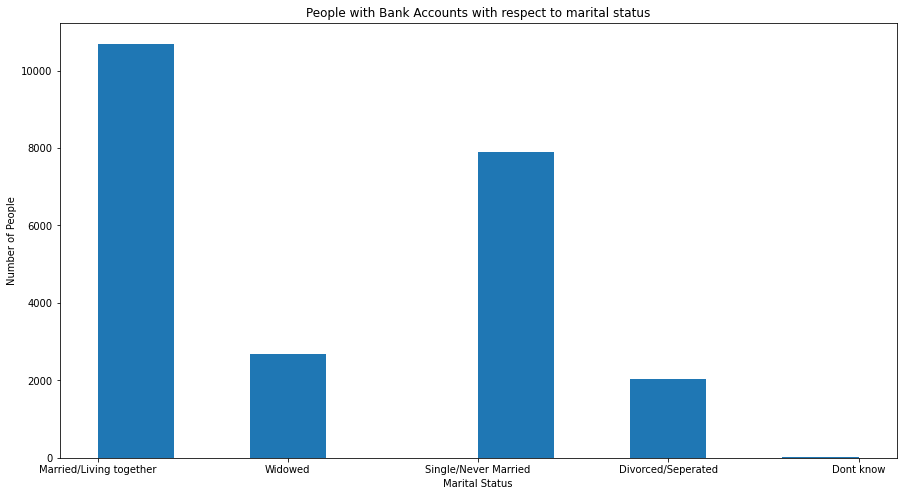

In [ ]:
#looking at people with bank Accounts with respect to marital status
plt.hist(banks_df['marital_status'])
plt.gcf().set_size_inches(15, 8)
# Labelling our x axis
plt.xlabel("Marital Status")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts with respect to marital status")
plt.show()
#this shows that people who are married have the most bank accounts

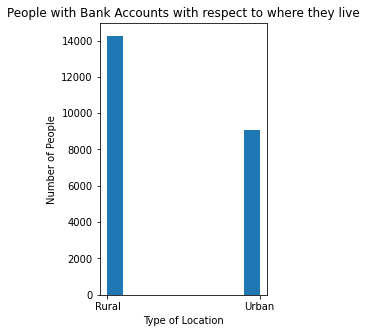

In [ ]:
plt.hist(banks_df['type_of_location'])
plt.gcf().set_size_inches(3, 5)
# Labelling our x axis
plt.xlabel("Type of Location")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts with respect to where they live")
plt.show()
#this shows that of the total number of people with bank accounts, more are from rural areas as compared to urban areas

No handles with labels found to put in legend.


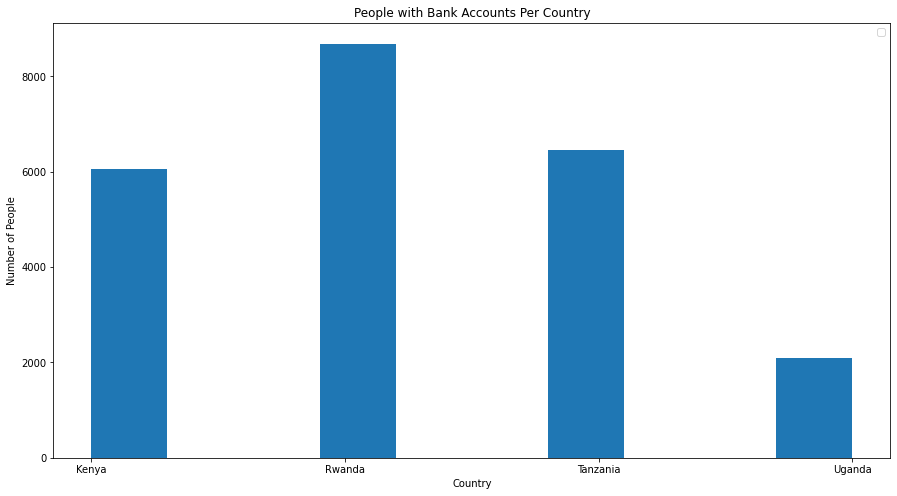

In [ ]:
#looking at people with banks with respect to country
plt.hist(banks_df['country'])
plt.gcf().set_size_inches(15, 8)
# Labelling our x axis
plt.xlabel("Country")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts Per Country")
plt.legend()
plt.show()
#this shows that of all the people with bank accounts, the highest percentage comes from Rwanda

No handles with labels found to put in legend.


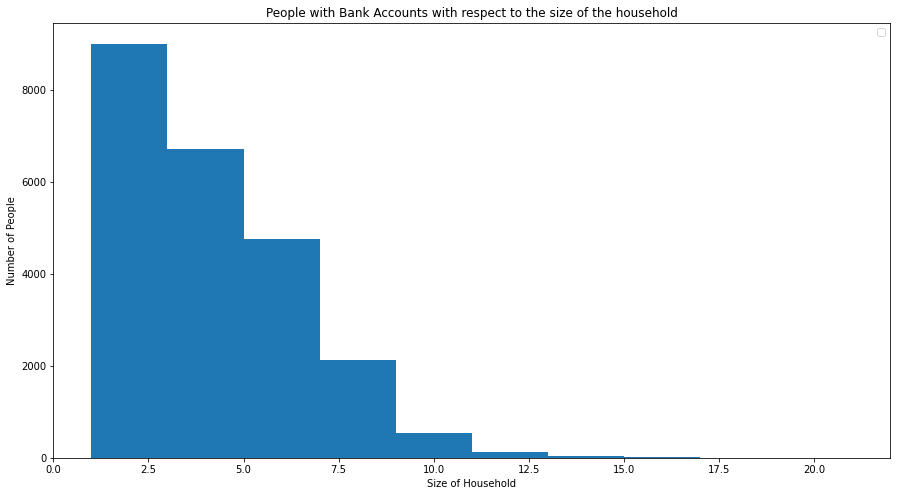

In [ ]:
#looking at people with banks with respect to the size of the household
plt.hist(banks_df['household_size'])
plt.gcf().set_size_inches(15, 8)
# Labelling our x axis
plt.xlabel("Size of Household")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts with respect to the size of the household")
plt.legend()
plt.show()
#bigger households are likely to have no bank accounts

No handles with labels found to put in legend.


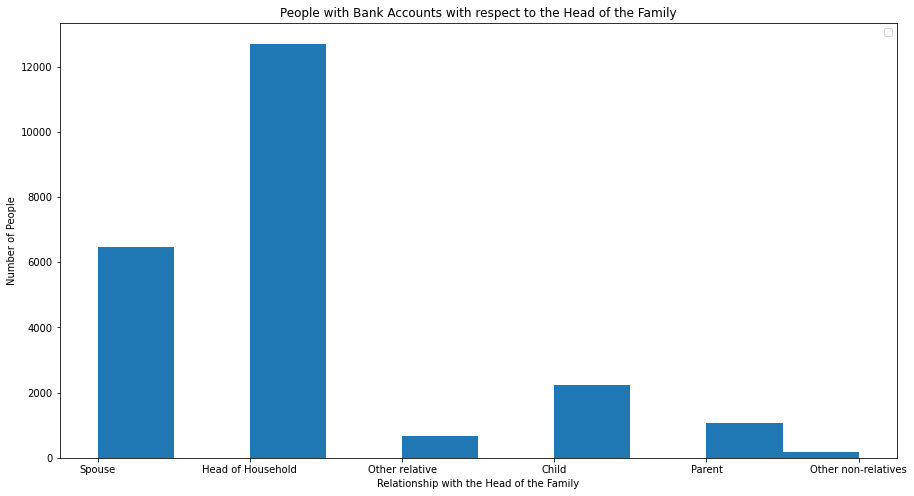

In [ ]:
#looking at people with banks with respect to marital status
plt.hist(banks_df['Relationship_with_head'])
plt.gcf().set_size_inches(15, 8)
# Labelling our x axis
plt.xlabel("Relationship with the Head of the Family")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts with respect to the Head of the Family")
plt.legend()
plt.show()
#this shows that of the people with bank accounts, most are likely to be heads of the household

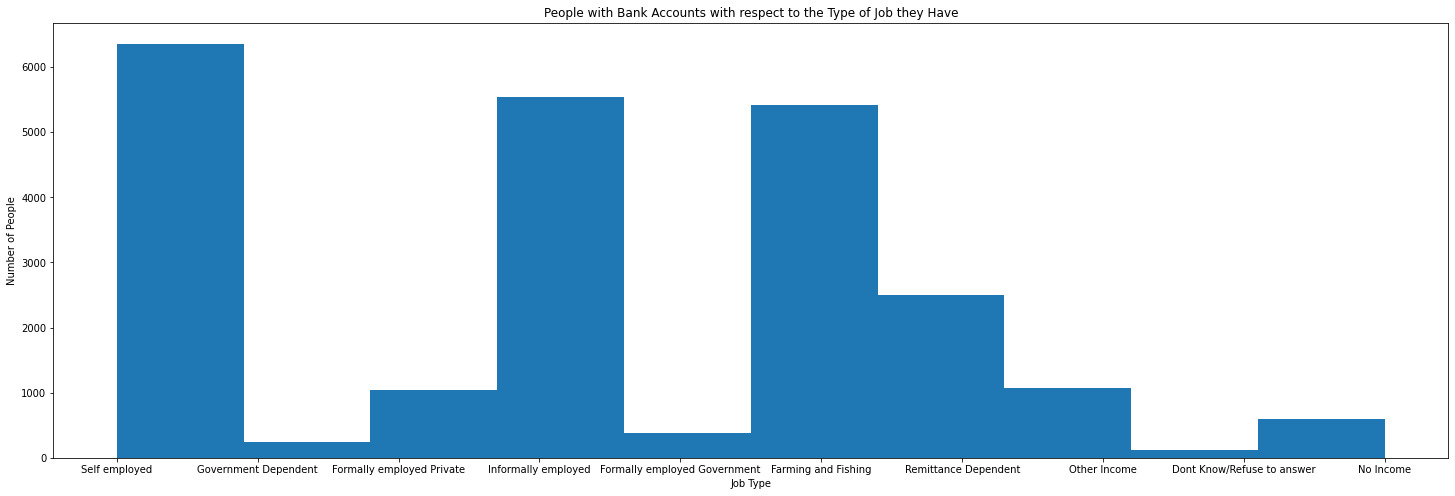

In [ ]:
#looking at people with banks with respect to type of job they have
plt.hist(banks_df['Job_Type'])
plt.gcf().set_size_inches(25, 8)
# Labelling our x axis
plt.xlabel("Job Type")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts with respect to the Type of Job they Have")
plt.show()
#this shows that of the people with bank accounts, the greatest percentage is self employed

No handles with labels found to put in legend.


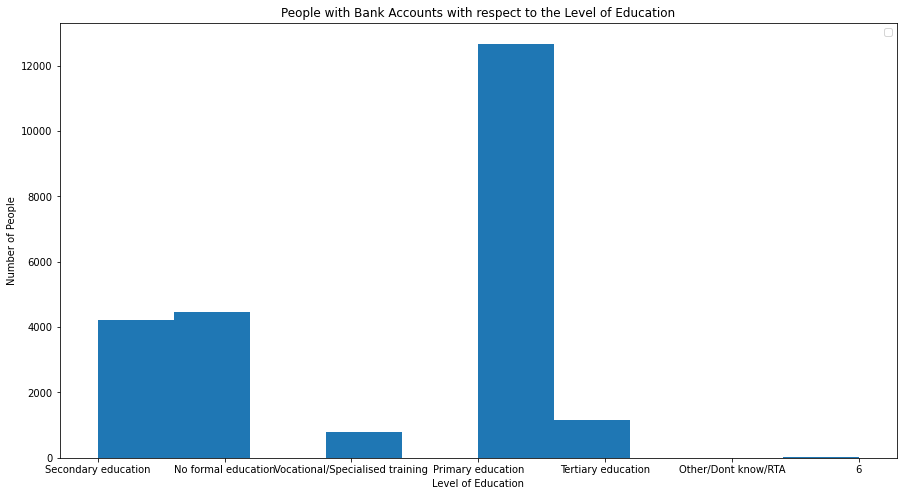

In [ ]:
#looking at people with banks with respect to level of education
plt.hist(banks_df['Education_Level'])
plt.gcf().set_size_inches(15, 8)
# Labelling our x axis
plt.xlabel("Level of Education")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts with respect to the Level of Education")
plt.legend()
plt.show()
#this shows that of all the people with bank accounts, the greatest number had at least primary education level

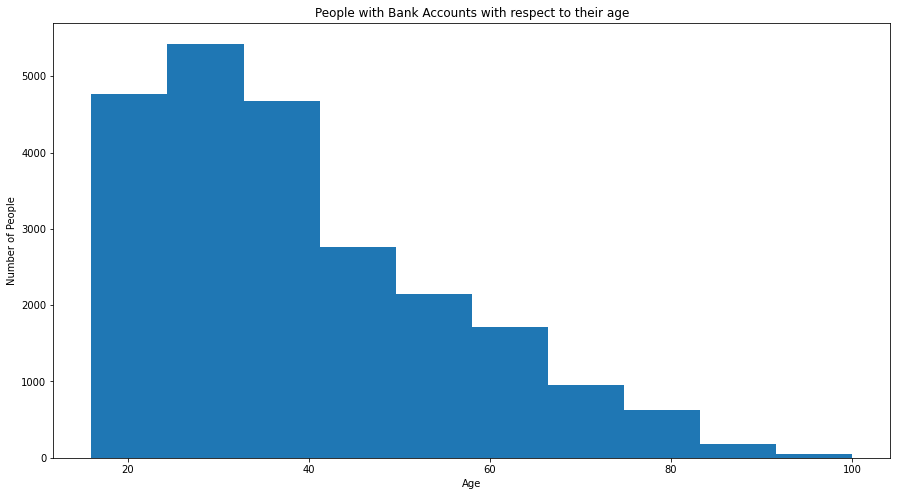

In [ ]:
plt.hist(banks_df['Age'], bins = 10)
plt.gcf().set_size_inches(15, 8)
# Labelling our x axis
plt.xlabel("Age")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts with respect to their age")
plt.show()

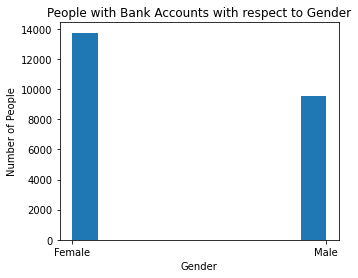

In [ ]:
plt.hist(banks_df['gender'])
plt.gcf().set_size_inches(5,4)
# Labelling our x axis
plt.xlabel("Gender")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts with respect to Gender")
plt.show()
#this shows that out of the people with bank accounts in these countres, there are more women than men

In [ ]:
#the average mean age for this data is
banks_df['Age'].mean()

38.77903634101343

In [ ]:
#the average age for people with bank accounts is
with_bank_accounts = banks_df['BANK_AC'] == 'Yes'
mean_for_with_bank_accounts = banks_df.loc[with_bank_accounts, 'Age'].mean()
print(mean_for_with_bank_accounts)

39.61104368932039


In [ ]:
banks_df['Age'].median()
#the median age of people in this data set is 35 years

35.0

In [ ]:
#the median age for people with bank accounts is
with_bank_accounts = banks_df['BANK_AC'] == 'Yes'
median_for_with_bank_accounts = banks_df.loc[with_bank_accounts, 'Age'].median()
print(median_for_with_bank_accounts)

36.0


In [ ]:
banks_df['Age'].mode()
#the mode age of people with bank accounts in these data set is 30 years

0    30.0
dtype: float64

In [ ]:
#the mode age for people with bank accounts is
with_bank_accounts = banks_df['BANK_AC'] == 'Yes'
mode_for_with_bank_accounts = banks_df.loc[with_bank_accounts, 'Age'].mode()
print(mode_for_with_bank_accounts)

0    30.0
dtype: float64


In [ ]:
banks_df['Age'].var()
#this data is very widely spread om terms of age

271.72959912280606

In [ ]:
#the data for those with bank accounts is less spread out
with_bank_accounts = banks_df['BANK_AC'] == 'Yes'
var_for_with_bank_accounts = banks_df.loc[with_bank_accounts, 'Age'].var()
print(var_for_with_bank_accounts)

205.72362913799947


In [ ]:
banks_df['Age'].std()
#this data is very widely spread om terms of age

16.48422273335343

In [ ]:
#when it comes to those with bank a/cs the data is less spread out
with_bank_accounts = banks_df['BANK_AC'] == 'Yes'
std_for_with_bank_accounts = banks_df.loc[with_bank_accounts, 'Age'].std()
print(std_for_with_bank_accounts)

14.343069027861487


In [ ]:
#find the max value in the age
banks_df_max=banks_df['Age'].max()
banks_df_max
#the oldest person with in this data set was 100 years old

100.0

In [ ]:
with_bank_accounts = banks_df['BANK_AC'] == 'Yes'
max_for_with_bank_accounts = banks_df.loc[with_bank_accounts, 'Age'].max()
print(max_for_with_bank_accounts)
#the oldest person with a bank account according to this data set was 95 years old

95.0


In [ ]:
#find the min value in the age
banks_df_min=banks_df['Age'].min()
banks_df_min
#the youngest person in this data set was 16 years old

16.0

In [ ]:
with_bank_accounts = banks_df['BANK_AC'] == 'Yes'
min_for_with_bank_accounts = banks_df.loc[with_bank_accounts, 'Age'].min()
print(min_for_with_bank_accounts)
#the youngest person with a bank account according to this data set was 16 years old

16.0


In [ ]:
#calculating the range
banks_df_max-banks_df_min
#the range of age of people in this dataset is 84years

84.0

In [ ]:
#calculating the range
max_for_with_bank_accounts-min_for_with_bank_accounts
#the range of age of people in this dataset is 79years

79.0

In [ ]:
#Quartiles
banks_df['Age'].quantile([0.25,0.5,0.75])
#the lower quantile is 26, the mean is 35 and the upper quantile is 49

0.25    26.0
0.50    35.0
0.75    49.0
Name: Age, dtype: float64

In [ ]:
with_bank_accounts = banks_df['BANK_AC'] == 'Yes'
qt_for_with_bank_accounts = banks_df.loc[with_bank_accounts, 'Age'].quantile([0.25,0.5,0.75])
print(qt_for_with_bank_accounts)
#the lower quantile is 29, the mean is 36 and the upper quantile is 48

0.25    29.0
0.50    36.0
0.75    48.0
Name: Age, dtype: float64


In [ ]:
#Skewness
banks_df['Age'].kurt()
#This is likely a normal distribution

0.09242946026485122

In [ ]:
with_bank_accounts = banks_df['BANK_AC'] == 'Yes'
kurt_for_with_bank_accounts = banks_df.loc[with_bank_accounts, 'Age'].kurt()
print(kurt_for_with_bank_accounts)
#A normal distribution curve

0.46631994043616576


In [ ]:
# Displaying the summary statistics of the dataframe

banks_df['Age'].describe()

count    23307.000000
mean        38.779036
std         16.484223
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Age, dtype: float64

In [ ]:
#summary stats for those with bank ACs
with_bank_accounts = banks_df['BANK_AC'] == 'Yes'
stat_for_with_bank_accounts = banks_df.loc[with_bank_accounts, 'Age'].describe()
print(stat_for_with_bank_accounts)

count    3296.000000
mean       39.611044
std        14.343069
min        16.000000
25%        29.000000
50%        36.000000
75%        48.000000
max        95.000000
Name: Age, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


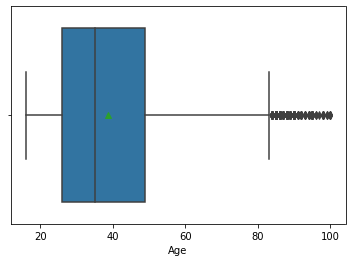

In [ ]:
sns.boxplot(banks_df["Age"], showmeans=True)
#this shows that most of the people in this data set  are btn 25 and 50

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


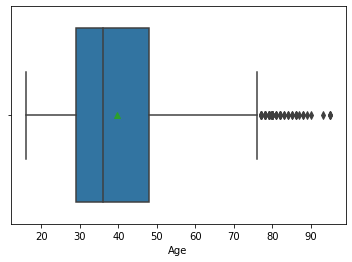

In [ ]:
with_bank_accounts = banks_df['BANK_AC'] == 'Yes'
y = banks_df.loc[with_bank_accounts, 'Age']
sns.boxplot(y, showmeans=True)
#most people with bank acounts are btn the ages of 30 and 50

Bivariate Analysis- Exploratory Data Analysis (EDA)

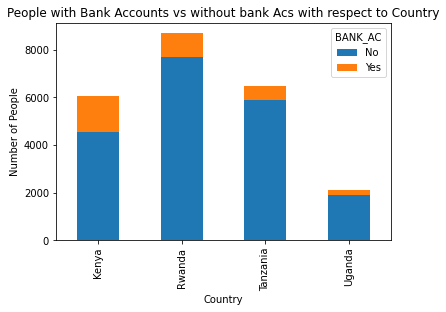

In [ ]:
pd.crosstab(banks_df['country'], banks_df['BANK_AC']).plot(kind='bar', stacked=True)
#this shows what percentage of the population has bank accounts per country
# Labelling our x axis
plt.xlabel("Country")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts vs without bank Acs with respect to Country")
plt.show()

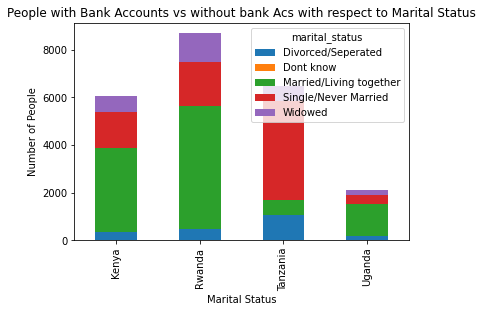

In [ ]:
pd.crosstab(banks_df['country'], banks_df['marital_status']).plot(kind='bar', stacked=True)
# Labelling our x axis
plt.xlabel("Marital Status")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts vs without bank Acs with respect to Marital Status")
plt.show()
#this shows what percentage of people per country according to their marital status

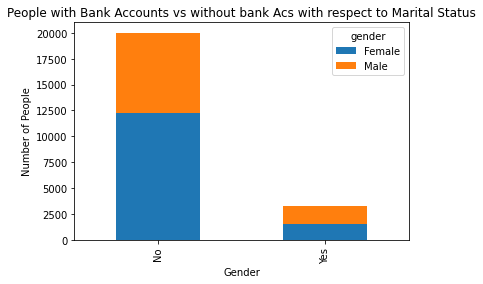

In [ ]:
pd.crosstab(banks_df['BANK_AC'], banks_df['gender']).plot(kind='bar', stacked=True)
# Labelling our x axis
plt.xlabel("Gender")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts vs without bank Acs with respect to Marital Status")
plt.show()
#this shows that more people do not have a bank account that those who do
#it also shows that out of the ones with a bank account, there are more men than women
#and for those without a bank account thre are more women than men 

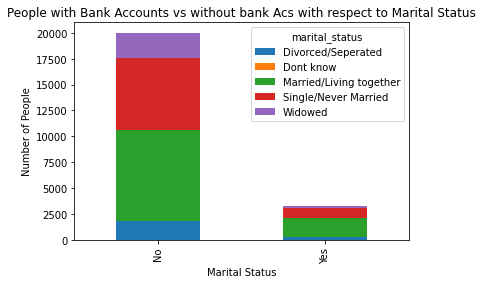

In [ ]:
pd.crosstab(banks_df['BANK_AC'], banks_df['marital_status']).plot(kind='bar', stacked=True)
plt.xlabel("Marital Status")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts vs without bank Acs with respect to Marital Status")
plt.show()
#This shows that of those without bank accounts, single/never married and married single are the most
#it also shows that of those with bank accounts, those married are the most

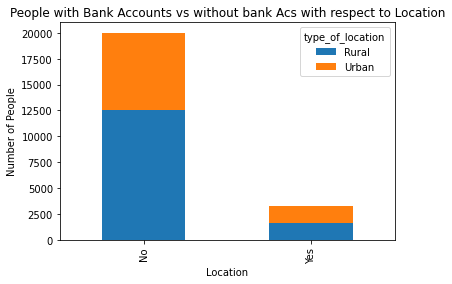

In [ ]:
pd.crosstab(banks_df['BANK_AC'], banks_df['type_of_location']).plot(kind='bar', stacked=True)
plt.xlabel("Location")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts vs without bank Acs with respect to Location")
plt.show()
#this shows of the people with bank accounts, there is an almost equal distribution btn rural and urban areas
#On the other hand, of those without bank accounts, the ones in the rural areas are slightly mor

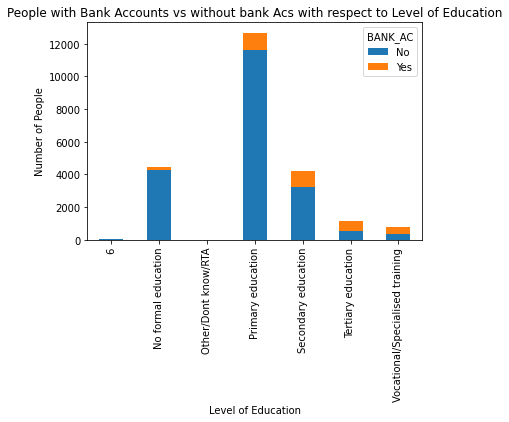

In [ ]:
pd.crosstab(banks_df['Education_Level'], banks_df['BANK_AC']).plot(kind='bar', stacked=True)
plt.xlabel("Level of Education")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("People with Bank Accounts vs without bank Acs with respect to Level of Education")
plt.show()
#this shows that most people without a bank account have a primary level of education

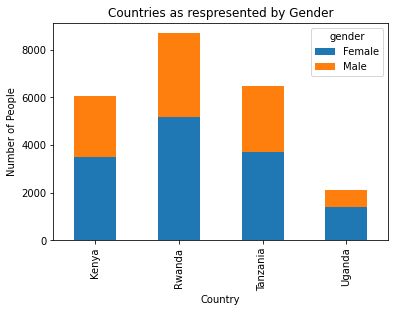

In [ ]:
pd.crosstab(banks_df['country'], banks_df['gender']).plot(kind='bar', stacked=True)
plt.xlabel("Country")

# Labelling our y axis
plt.ylabel("Number of People")

# Giving a title to our Bar chart
plt.title("Countries as respresented by Gender")
plt.show()
#the gender dynamic shows that across all countries, there are more women than men with bank account

MultiVariate Analysis Using Factor Analysis

In [ ]:
#separate datasets
X= banks_df.iloc[:, 0:4],values
Y= banks_df.iloc[:, 4],values

NameError: ignored